<a href="https://colab.research.google.com/github/Yashi002/Data-Analytics/blob/main/PythonDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.shape[0] * 45/100

400.95



*   took 45 just for some analysis, no other reason at all
  






Description Of Datasets

Passenger class
survivor

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
x = df.isnull().sum()

drop_col = x[x>(45/100 * df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop_col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df['Embarked'].fillna('S' ,inplace = True)

In [ ]:
df.isnull().sum()


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [ ]:
df['FamilySize']= df['SibSp']+df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000


In [ ]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,1


In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [ ]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [ ]:
df['Sex'] = [0 if df['Sex'][i]== 'male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

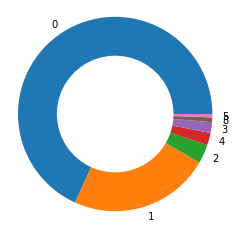

In [5]:
sorted_counts = df['SibSp'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, wedgeprops = {'width' : 0.4});
plt.axis('square');

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

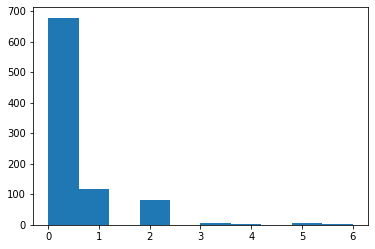

In [6]:
plt.hist(data = df, x = 'Parch')

### My Analysis

1) More number of women passenger survived than male

2)The passengers who were with their families were survived more, having higher rate
for illustration,I've drawn the graph

3)The rich also have higher survival rate , may be as they were prefered more over others

4)More number of Passengers survived who already boarded at Cherbourg

5) Only cabin column was returned, as it satisfies that the value is greater than 45%


6)Added Histogram and Donut plot for more illutration


